In [ ]:
!pip install transformers
import matplotlib.pyplot as plt
import pandas as pd
from transformers import AutoTokenizer
import numpy as np
import os 

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.1/7.1 MB 28.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 224.5/224.5 kB 18.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.8/7.8 MB 60.6 MB/s eta 0:00:00


In [ ]:
import random
import numpy as np

seed = 42
random.seed(seed)
os.environ['PYTHONHASHSEED'] = str(seed)
np.random.seed(seed)

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
%cd  "drive/MyDrive/TUM XAI/classifiers/data"

/content/drive/.shortcut-targets-by-id/1m6AYZbd3XOUMFqsgOLrRp8rl9q4ZPFfZ/TUM XAI/classifiers/data


In [ ]:
!ls

 archive
 classifier_input_restricted.csv
 classifier_input_restricted_test.csv
 classifier_input_restricted_train.csv
 data_nlp2022
 preds_classifier_input_restricted_test_0_2000.csv
 preds_classifier_input_restricted_test_2000_3000.csv
 preds_classifier_input_restricted_test_3000_4000.csv
 preds_classifier_input_restricted_test_4000_5000.csv
 preds_classifier_input_restricted_test_5000_7000.csv
 preds_classifier_input_restricted_test_7000_8000.csv
 preds_gpt3curienlp2022_restricted_test_0_500.csv
 preds_gpt3curienlp2022_restricted_test_500_1000.csv
 preds_realnlp2022_restricted_4000_0_500.csv
 preds_realnlp2022_restricted_4000_1000_1500.csv
 preds_realnlp2022_restricted_4000_1500_2000.csv
 preds_realnlp2022_restricted_4000_2000_2500.csv
 preds_realnlp2022_restricted_4000_2500_3000.csv
 preds_realnlp2022_restricted_4000_3000_3500.csv
 preds_realnlp2022_restricted_4000_3500_4000.csv
 preds_realnlp2022_restricted_4000_500_1000.csv
 scigen_papers.csv
'stats and cleaning.ipynb'


In [ ]:
galactica_path = "generators/Galactica/output/"
chatgpt_path = "generators/chatGPT/output/"
real_path = "XAI databases/"
gpt2_path = "generators/GPT-2/"
sigen_path = "./"

DATABASE_PATH = os.path.join("..", "..", "XAI databases")

In [ ]:
galactica_df = pd.read_csv(os.path.join("..", "..", galactica_path, "galactica_output_complete_cleaned.csv")).drop(["Unnamed: 0"], axis = 1)
chatgpt_df = pd.read_csv(os.path.join("..", "..", chatgpt_path, "chatgpt_output_complete.csv")).drop(["Unnamed: 0"], axis = 1)
gpt2_df = pd.read_csv(os.path.join("..", "..", gpt2_path, "gpt2_papers.csv")).drop(["Unnamed: 0"], axis = 1)
scigen_df = pd.read_csv(os.path.join(sigen_path, "scigen_papers.csv")).drop(["Unnamed: 0"], axis = 1)

real_train_df = pd.read_csv(os.path.join(DATABASE_PATH, "real_for_training_classifiers.csv"))
real_test_df = pd.read_csv(os.path.join(DATABASE_PATH, "real_for_testing_classifiers.csv"))
real_df = real_train_df.append(real_test_df, ignore_index = True)

FileNotFoundError: ignored

In [ ]:
chatgpt_info = pd.read_csv(os.path.join(DATABASE_PATH, "chatgpt.csv"))
galactica_info = pd.read_csv(os.path.join(DATABASE_PATH, "galactica.csv"))

In [ ]:
def merge_paper_info(paper_df, info_df, by = "title_id"):
  # title id is just used merge the two dfs based on title after removing all spaces.
  # this is used to make sure that different versions of the data are compatible.
  if (by == "title_id"):
    paper_df["title_id"] = paper_df["title"].str.replace(" ", "")
    info_df["title_id"] = info_df["title"].str.replace(" ", "")
    paper_df = paper_df.drop(["title"], axis = 1)
  return info_df.merge(paper_df, on = by).drop("title_id", axis = 1)

Here we merge the datasets back with the information datasets based on the title. This is done to make sure that we have all information about the papers in one place in the case of datasets that had the information removed later. 

In [ ]:
galactica_df = merge_paper_info(galactica_df, galactica_info)
chatgpt_df = merge_paper_info(chatgpt_df, chatgpt_info)

In [ ]:
galactica_df

,id,year,title,categories,abstract,introduction,conclusion
0,1801.07314,2018,Control of Large Swarms via Random Finite Set ...,cs.SY,We apply Random Finite Set (RFS) theory to sol...,The recent development of micro-aerial vehicle...,- The controller proposed in this paper does n...
1,1709.02188,2017,A lower bound of the hyperbolic dimension for ...,math.DS math.CV,We give a lower bound of logarithmic Holder di...,"In this paper, we study the hyperbolic dimensi...",We prove that every meromorphic function whic...
2,1801.00901,2018,Bounded birationality and isomorphism problems...,math.AG,Bounded birationality of a projective variety ...,Bounded birationality of a projective variety ...,We give a criterion for the computability of b...
3,0704.0580,2007,Ising-like dynamics and frozen states in syste...,cond-mat.dis-nn cond-mat.stat-mech,In this article it is shown that the Ising-lik...,"In recent years, magnetic properties of ultraf...",In this contribution we have considered the fo...
4,1512.08156,2015,Geometry of Membrane Sigma Models,math.DG hep-th,The recently proposed membrane sigma model for...,"In recent papers [, ] a new approach to the qu...",The quantum field theory on two-dimensional Mi...
...,...,...,...,...,...,...,...
4539,0909.1381,2009,On Necessary and Sufficient Number of Cops in ...,cs.DM,In this paper the game of cops and robber in m...,The game of cops and robber is a classic game ...,1. We have proved that the necessary and suffi...
4540,1610.07913,2016,Photon-Induced Selenium Vacancies in TiSe2,cond-mat.str-el cond-mat.mes-hall,The electronic properties of a defect state in...,2D materials are a new frontier in condensed m...,2D TiSe\({}_{2-\delta}\) has a defect band alo...
4541,1204.2800,2012,A comment on chiral restoration at finite bary...,nucl-th,We study the chiral restoration in finite bary...,The chiral symmetry breaking in QCD is expecte...,1. The finite-density phase transition is of t...
4542,1212.2047,2012,Few-Cycle Pulse Generation in an X-Ray Free-El...,physics.acc-ph,A pulse-compression scheme is proposed for few...,The generation of intense few-cycle pulses in ...,The numerical results show that the few-cycle ...


In [ ]:
chatgpt_df

,id,year,title,categories,abstract,introduction,conclusion
0,1302.5875,2013,Updates of the nuclear equation of state for c...,astro-ph.HE nucl-th,The nuclear equation of state (EOS) plays a cr...,Core-collapse supernovae and neutron stars are...,"Despite the recent progress, many challenges r..."
1,1209.6497,2012,Malliavin calculus method for asymptotic expan...,q-fin.PR math.OC math.PR q-fin.RM,"In this paper, we present a new approach for t...",Dual control problems are optimization problem...,"In this paper, we have presented a new approac..."
2,1402.1168,2014,What is the physical origin of strong Lya emis...,astro-ph.CO,The Lyman-alpha (Lya) emission line is a commo...,The Lyman-alpha (Lya) emission line is a power...,Our analysis of the kinematics and distributio...
3,1310.6768,2013,Galaxy Infall Kinematics as a Test of Modified...,astro-ph.CO,Modified gravity theories provide an alternati...,The observation of the acceleration of the exp...,"In summary, the kinematics of galaxy infall pr..."
4,1803.11406,2018,PT-symmetric and antisymmetric nonlinear state...,physics.optics nlin.PS,"In this study, we investigate the properties o...","In recent years, there has been a growing inte...",Our results show that PT-symmetric states exhi...
...,...,...,...,...,...,...,...
4995,1104.5607,2011,Validity of Fluctuation Theorem on Self-Propel...,cond-mat.stat-mech,The fluctuation theorem is a mathematical theo...,"Self-propelling particles, such as bacteria an...","Overall, the fluctuation theorem has proven to..."
4996,0903.3974,2009,A Re-analysis of Gravitino Dark Matter in the ...,hep-ph astro-ph.CO,"In this work, we present a re-analysis of grav...","The nature of dark matter, which comprises app...","In summary, we have presented a re-analysis of..."
4997,1806.07051,2018,Systematization of a 256-bit lightweight block...,cs.CR,Marvin is a 256-bit lightweight block cipher d...,"In recent years, there has been a growing dema...",Marvin is a 256-bit lightweight block cipher d...
4998,1712.06079,2017,A pseudopotential multiphase lattice Boltzmann...,physics.comp-ph,"In this paper, we present a pseudopotential mu...","Multiphase flows, where there are multiple flu...","In this paper, we have presented a pseudopoten..."


In [ ]:
tokenizer = AutoTokenizer.from_pretrained('facebook/galactica-1.3b')

## Functions

In [ ]:
def get_tokenized_lens(df, clmn, row_lens_clmn = None, print_min_title = True):
    """
    Returns the lengths tokenized text found in the column `clmn` of `df`.

    Parameters
    ----------
    df : DataFrame

    clmn: str
        column name of the column used. Must be a column in `df`.

    row_lens_clmn: str
        the column where the lengths of the tokenized text of each row
         of df[clmn] exist.
        if not None, tokenization with the global variable `tokenizer` is used
        to get the statistics.

    print_min_title: bool
        prnt the title of the corrsponding min. tokens length
        value found in the section `clmn`.
    """
    if (row_lens_clmn is None):
        tokenized_text_lens = [len(tokenizer.encode(elem)) for elem in df[clmn]]
    else:
        tokenized_text_lens = list(df[row_lens_clmn])
    max_len = max(tokenized_text_lens)
    min_len = min(tokenized_text_lens)
    mean_len = np.mean(tokenized_text_lens)
    median_len = np.median(tokenized_text_lens)

    i_min = tokenized_text_lens.index(min_len)
    if (print_min_title):
      print(f"Title associated with min tokens length found in {clmn}: {df['title'].iloc[i_min]}")

    print(f"min {clmn} tokens length {min_len}")
    print(f"max {clmn} tokens length {max_len}")
    print(f"mean {clmn} tokens length {mean_len}")
    print(f"median {clmn} tokens length {median_len}")

    # plt.hist(tokenized_text_lens, bins = 30)
    # plt.show()
    return tokenized_text_lens

In [ ]:
def restrict_input_tokens(df, abs_low = 30, abs_hi = 512, intro_lo = 50, intro_hi = 1024, conc_lo = 50, conc_hi = 1024, title = True, just_visualize = False):
  """
  Filter the paper sections based on the number of tokens.

  Parameters
  ----------
  df : DataFrame
      A pandas DataFrame containing the paper sections to filter.

  abs_low : int, optional
      The lower bound for the number of tokens in the abstract section. Papers with fewer tokens than this will be excluded.

  abs_hi : int, optional
      The upper bound for the number of tokens in the abstract section. Papers with more tokens than this will be excluded.

  intro_lo : int, optional
      The lower bound for the number of tokens in the introduction section. Papers with fewer tokens than this will be excluded.

  intro_hi : int, optional
      The upper bound for the number of tokens in the introduction section. Papers with more tokens than this will be excluded.

  conc_lo : int, optional
      The lower bound for the number of tokens in the conclusion section. Papers with fewer tokens than this will be excluded.

  conc_hi : int, optional
      The upper bound for the number of tokens in the conclusion section. Papers with more tokens than this will be excluded.

  title : bool, optional
      Whether or not to include the title section in the filter. Default is True.

  just_visualize: bool, optional
      Do visualization without filtering the data.

  Returns
  -------
  DataFrame
      A filtered pandas DataFrame containing the paper sections that meet the specified token length criteria.
  """

  # drop all na values.
  if (title):
    df.dropna(subset=["title", "abstract", "introduction", "conclusion"])
  else:
    df.dropna(subset=["abstract", "introduction", "conclusion"])

  if (title):
    lens_title  = get_tokenized_lens(df, "title")

  lens_abs = get_tokenized_lens(df, "abstract", print_min_title = title)
  lens_intro = get_tokenized_lens(df, "introduction", print_min_title = title)
  lens_conc = get_tokenized_lens(df, "conclusion", print_min_title = title)

  fig, ax = plt.subplots(nrows=1, ncols=4 if title else 3, figsize=(20, 8))
  fig.suptitle(f'token lengths of raw data (len = {len(df)})', fontsize=16)

  ax[0].hist(lens_abs, bins = 30)
  ax[0].set_title("abstract tokens lengths")
  ax[1].hist(lens_intro, bins = 30)
  ax[1].set_title("introduction tokens lengths")
  ax[2].hist(lens_conc, bins = 30)
  ax[2].set_title("conclusion tokens lengths")
  if (title):
    ax[3].hist(lens_title, bins = 30)
    ax[3].set_title("title tokens lengths")

  if (not just_visualize):
    # append lengths tokens to df.
    df["conc_tokens"] = lens_conc
    df["intro_tokens"] = lens_intro
    df["abs_tokens"] = lens_abs

    df_restricted = df[(abs_low < df["abs_tokens"]) & (df["abs_tokens"] <= abs_hi) 
                      & (intro_lo < df["conc_tokens"]) & (df["conc_tokens"] <= intro_hi) 
                      & (conc_lo < df["intro_tokens"]) & (df["intro_tokens"] <= conc_hi)]


    # get new lens of the filtered data.
    lens_abs = get_tokenized_lens(df_restricted, "abstract", "abs_tokens", print_min_title = title)
    lens_intro = get_tokenized_lens(df_restricted, "introduction", "intro_tokens", print_min_title = title)
    lens_conc = get_tokenized_lens(df_restricted, "conclusion", "conc_tokens", print_min_title = title)

    fig, ax = plt.subplots(nrows=1, ncols=4 if title else 3, figsize=(20, 8))
    fig.suptitle(f'after filtering (len = {len(df_restricted)})', fontsize=16)

    ax[0].hist(lens_abs, bins = 30)
    ax[0].set_title("abstract tokens lengths")
    ax[1].hist(lens_intro, bins = 30)
    ax[1].set_title("introduction tokens lengths")
    ax[2].hist(lens_conc, bins = 30)
    ax[2].set_title("conclusion tokens lengths")
    if (title):
      ax[3].hist(lens_title, bins = 30)
      ax[3].set_title("title tokens lengths")

    return df_restricted

In [ ]:
def create_dataset(real_df, scigen_df, gpt2_df, galactica_df, chatgpt_df):
  # number of rows per class.
  N_GEN_TRAIN = 2000
  N_REAL_TRAIN = N_GEN_TRAIN * 4

  N_GEN_TEST = 1000
  N_REAL_TEST = N_GEN_TEST * 4

  # create indices.
  indices_real_train = range(0, N_REAL_TRAIN)
  indices_gen_train = range(0, N_GEN_TRAIN)

  indices_real_test = range(N_REAL_TRAIN, N_REAL_TRAIN + N_REAL_TEST)
  indices_gen_test = range(N_GEN_TRAIN, N_GEN_TRAIN + N_GEN_TEST)

  # reset indices after filtering
  real_df = real_df.reset_index(drop=True)
  scigen_df = scigen_df.reset_index(drop=True)
  gpt2_df = gpt2_df.reset_index(drop=True)
  galactica_df = galactica_df.reset_index(drop=True)
  chatgpt_df = chatgpt_df.reset_index(drop=True)

  real_df["src"] = "real"
  real_df.loc[real_df.index.isin(indices_real_train), "split"] = "train"
  real_df.loc[real_df.index.isin(indices_real_test), "split"] = "test"

  scigen_df["src"] = "scigen"
  scigen_df.loc[scigen_df.index.isin(indices_gen_train), "split"] = "train"
  scigen_df.loc[scigen_df.index.isin(indices_gen_test), "split"] = "test"

  gpt2_df["src"] = "gpt2"
  gpt2_df.loc[gpt2_df.index.isin(indices_gen_train), "split"] = "train"
  gpt2_df.loc[gpt2_df.index.isin(indices_gen_test), "split"] = "test"

  galactica_df["src"] = "galactica"
  galactica_df.loc[galactica_df.index.isin(indices_gen_train), "split"] = "train"
  galactica_df.loc[galactica_df.index.isin(indices_gen_test), "split"] = "test"

  chatgpt_df["src"] = "chatgpt"
  chatgpt_df.loc[chatgpt_df.index.isin(indices_gen_train), "split"] = "train"
  chatgpt_df.loc[chatgpt_df.index.isin(indices_gen_test), "split"] = "test"
  
  ds = pd.concat([real_df, scigen_df, gpt2_df, galactica_df, chatgpt_df], ignore_index=True, sort=False)
  ds["label"] = np.where(ds["src"] == "real", 0, 1)
  shuffled_ds = ds.sample(frac=1, random_state=seed)

  return shuffled_ds

## Filtering Papers

Here we restrict the tokens of each section as follows:

Abstract between 30 and 512 tokens.
Introduction between 50 and 1024 tokens.
Abstract between 50 and 1024 tokens.

Title associated with min tokens length found in title: KERN
min title tokens length 1
max title tokens length 113
mean title tokens length 14.702266586610627
median title tokens length 14.0
Title associated with min tokens length found in abstract: Maxwell's Equations in Media and Their Solution
min abstract tokens length 15
max abstract tokens length 991
mean abstract tokens length 216.22996097268089
median abstract tokens length 203.0
Title associated with min tokens length found in introduction: Content-Level Selective Offloading in Heterogeneous Networks: Multi-armed Bandit Optimization and Regret Bounds
min introduction tokens length 21
max introduction tokens length 13794
mean introduction tokens length 928.8747748423897
median introduction tokens length 817.0
Title associated with min tokens length found in conclusion: A biomechanical model of swallowing for understanding the influence of saliva and food bolus viscosity on flavour release
min conclusion tokens length 21
max con

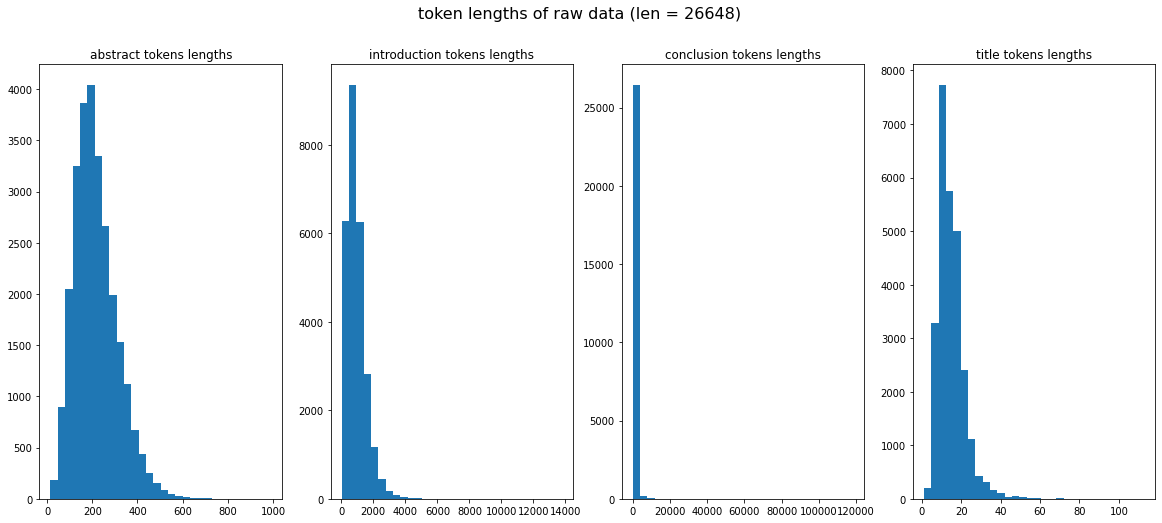

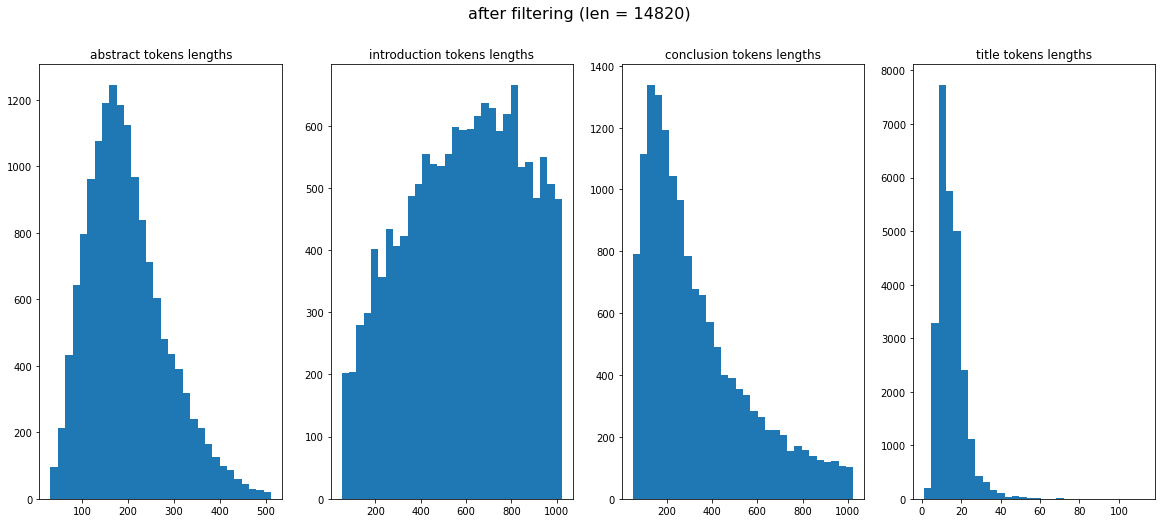

In [ ]:
restricted_real = restrict_input_tokens(real_df)

Title associated with min tokens length found in title: Quantum Machines
min title tokens length 2
max title tokens length 80
mean title tokens length 14.376
median title tokens length 13.0
Title associated with min tokens length found in abstract: A One-Sentence Line-of-Sight Proof of the Extreme Value Theorem
min abstract tokens length 21
max abstract tokens length 275
mean abstract tokens length 104.0198
median abstract tokens length 100.0
Title associated with min tokens length found in introduction: On the cohomology rings of Grassmann varieties and Hilbert schemes
min introduction tokens length 56
max introduction tokens length 670
mean introduction tokens length 225.339
median introduction tokens length 216.0
Title associated with min tokens length found in conclusion: Combinatorial interpretations of the Kreweras triangle in terms of subset tuples
min conclusion tokens length 2
max conclusion tokens length 416
mean conclusion tokens length 93.6868
median conclusion tokens lengt

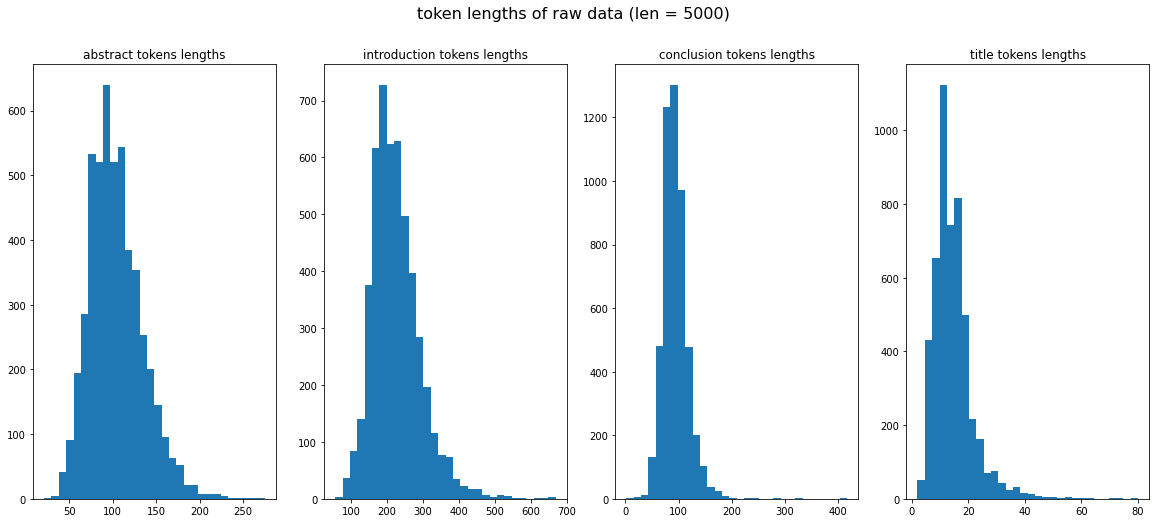

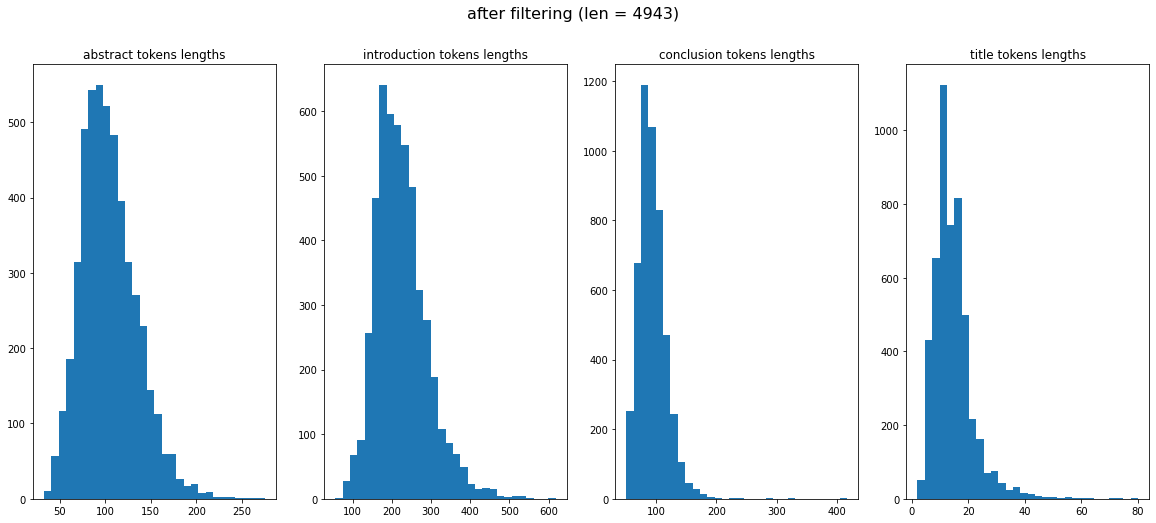

In [ ]:
restricted_chatgpt = restrict_input_tokens(chatgpt_df)

In [ ]:
# set . to introductions that are not complete.
restricted_chatgpt.loc[restricted_chatgpt["introduction"].str[-1] != ".", "introduction"] = "."

# remove conclusions that dont have an ending since they are not complete.
restricted_chatgpt = restricted_chatgpt[restricted_chatgpt["conclusion"].str[-1] == "."]

/usr/local/lib/python3.8/dist-packages/pandas/core/indexing.py:1817: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_column(loc, value, pi)


Title associated with min tokens length found in title: Temporal Matching
min title tokens length 2
max title tokens length 96
mean title tokens length 14.382
median title tokens length 13.0
Title associated with min tokens length found in abstract: On existential definitions of C.E. subsets of rings of functions of characteristic 0
min abstract tokens length 7
max abstract tokens length 735
mean abstract tokens length 234.6385
median abstract tokens length 191.0
Title associated with min tokens length found in introduction: Linear kernels for k-tuple and liar's domination in bounded genus graphs
min introduction tokens length 2
max introduction tokens length 1155
mean introduction tokens length 363.1725
median introduction tokens length 386.0
Title associated with min tokens length found in conclusion: Couplings of heavy mesons with soft pions in QCD
min conclusion tokens length 2
max conclusion tokens length 1138
mean conclusion tokens length 315.498
median conclusion tokens length 3

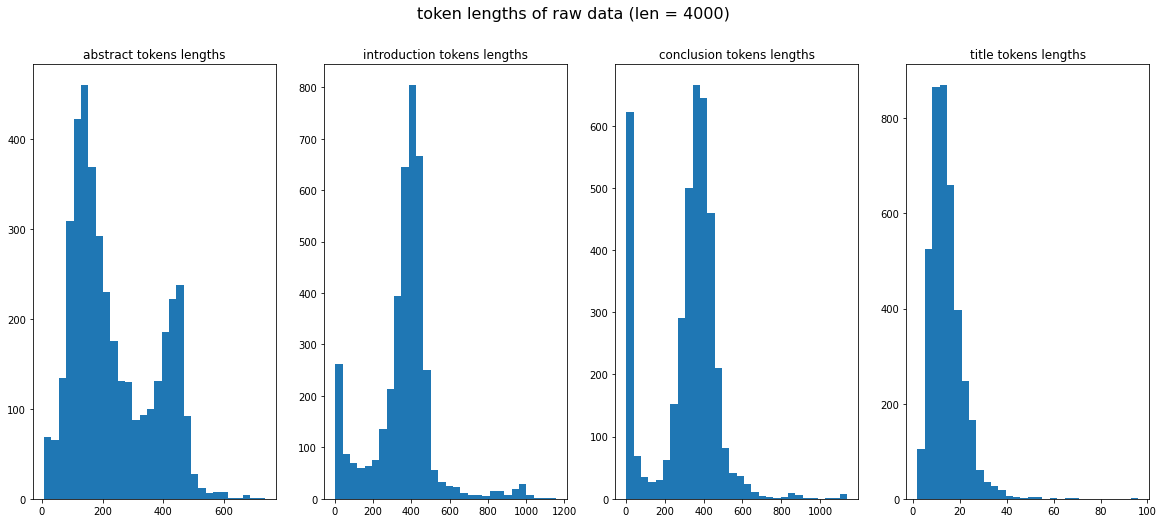

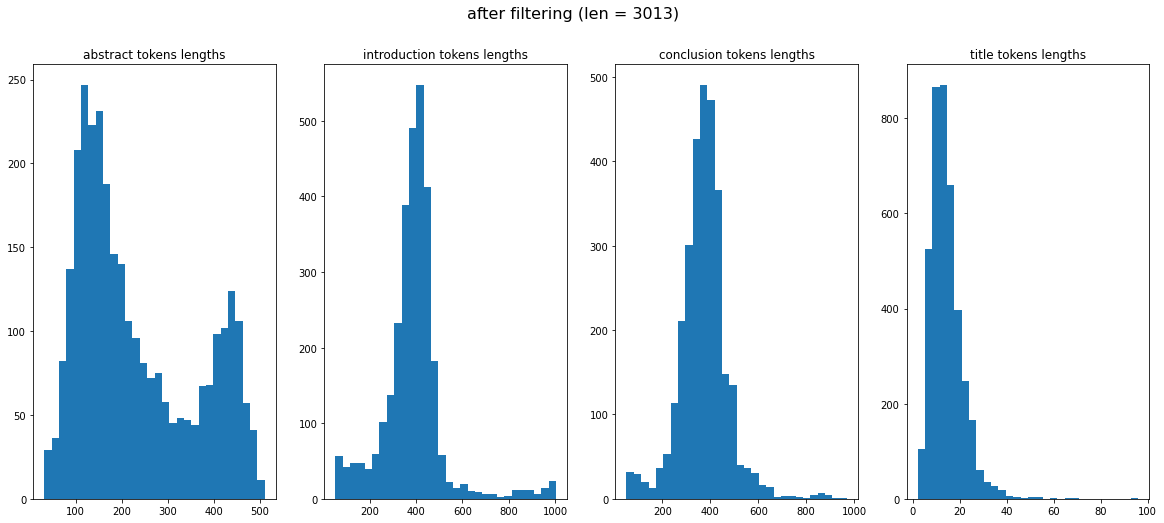

In [ ]:
restricted_gpt2 = restrict_input_tokens(gpt2_df)

Title associated with min tokens length found in title: Eﬃcient Symmetries
min title tokens length 2
max title tokens length 31
mean title tokens length 9.569397156018425
median title tokens length 9.0
Title associated with min tokens length found in abstract: On the Improvement of Digital-to-Analog Converters
min abstract tokens length 32
max abstract tokens length 159
mean abstract tokens length 80.2347286200681
median abstract tokens length 79.0
Title associated with min tokens length found in introduction: A Case for RAID
min introduction tokens length 133
max introduction tokens length 1061
mean introduction tokens length 416.7484478269577
median introduction tokens length 428.0
Title associated with min tokens length found in conclusion: A Case for the World Wide Web
min conclusion tokens length 26
max conclusion tokens length 385
mean conclusion tokens length 130.8411776487082
median conclusion tokens length 116.0


<ipython-input-29-6b57129b854d>:65: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["conc_tokens"] = lens_conc
<ipython-input-29-6b57129b854d>:66: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["intro_tokens"] = lens_intro
<ipython-input-29-6b57129b854d>:67: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexin

Title associated with min tokens length found in abstract: On the Improvement of Digital-to-Analog Converters
min abstract tokens length 32
max abstract tokens length 159
mean abstract tokens length 80.22523633374435
median abstract tokens length 79.0
Title associated with min tokens length found in introduction: A Case for RAID
min introduction tokens length 133
max introduction tokens length 1012
mean introduction tokens length 416.9256062474312
median introduction tokens length 428.5
Title associated with min tokens length found in conclusion: Visualizing 16 Bit Architectures and Local-Area Networks
min conclusion tokens length 51
max conclusion tokens length 385
mean conclusion tokens length 133.0661734484176
median conclusion tokens length 117.5


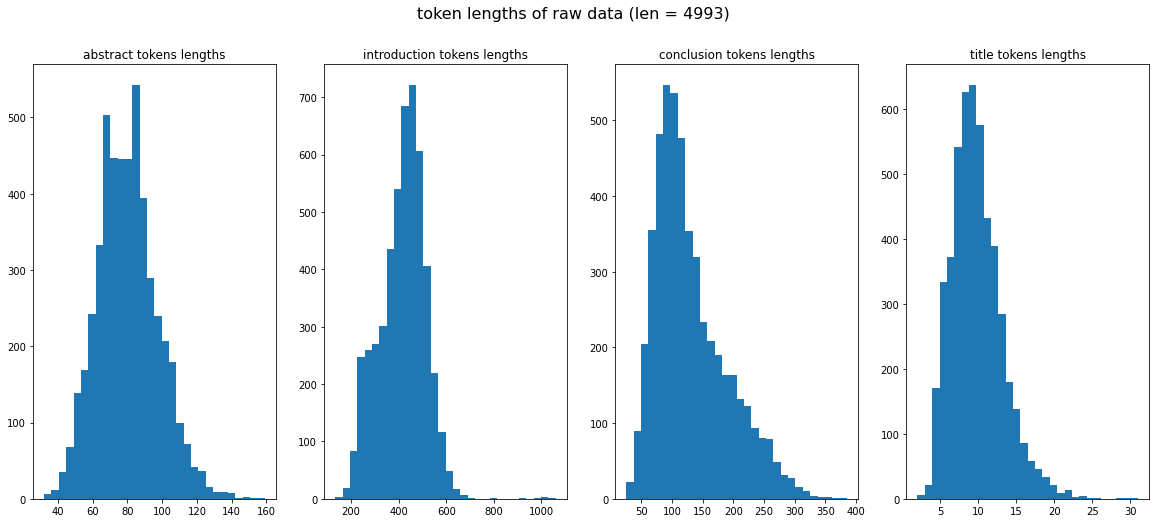

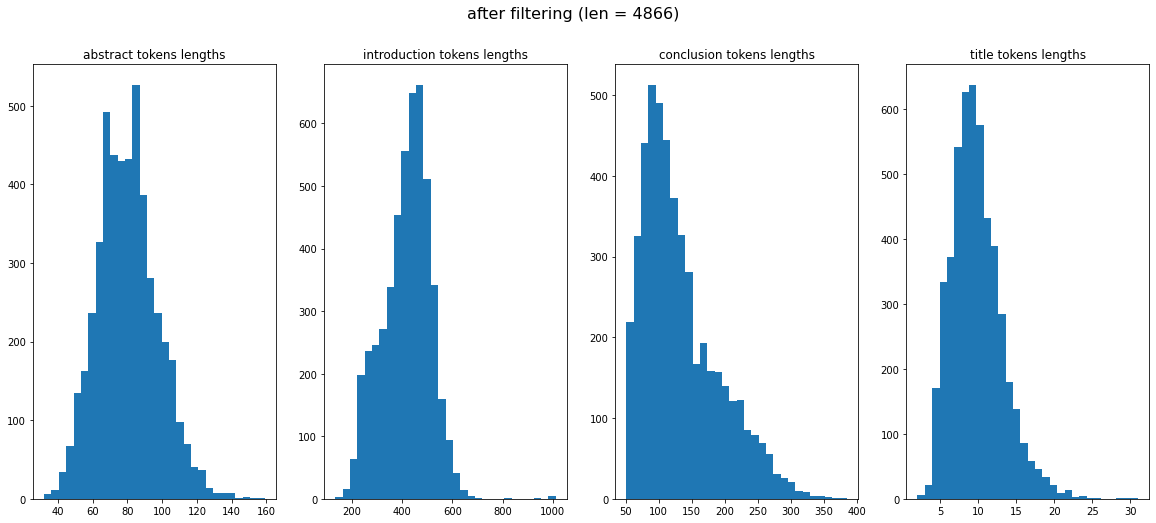

In [ ]:
restricted_scigen = restrict_input_tokens(scigen_df.dropna())

Title associated with min tokens length found in title: Quantum Algorithms
min title tokens length 2
max title tokens length 67
mean title tokens length 14.490977112676056
median title tokens length 13.0
Title associated with min tokens length found in abstract: Sublinear Algorithms for Approximating String Compressibility
min abstract tokens length 10
max abstract tokens length 507
mean abstract tokens length 162.00154049295776
median abstract tokens length 145.0
Title associated with min tokens length found in introduction: Feeding and Feedback in the Inner Kiloparsec of the Active Galaxy NGC2110
min introduction tokens length 7
max introduction tokens length 3459
mean introduction tokens length 286.5413732394366
median introduction tokens length 235.0
Title associated with min tokens length found in conclusion: Single-top production and rare top interactions
min conclusion tokens length 30
max conclusion tokens length 1025
mean conclusion tokens length 173.7081866197183
median concl

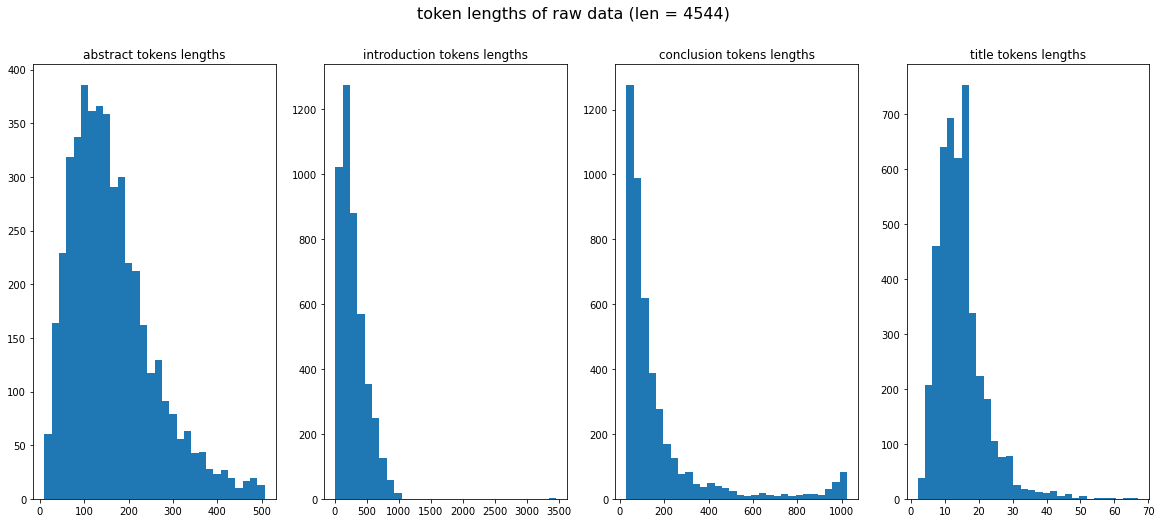

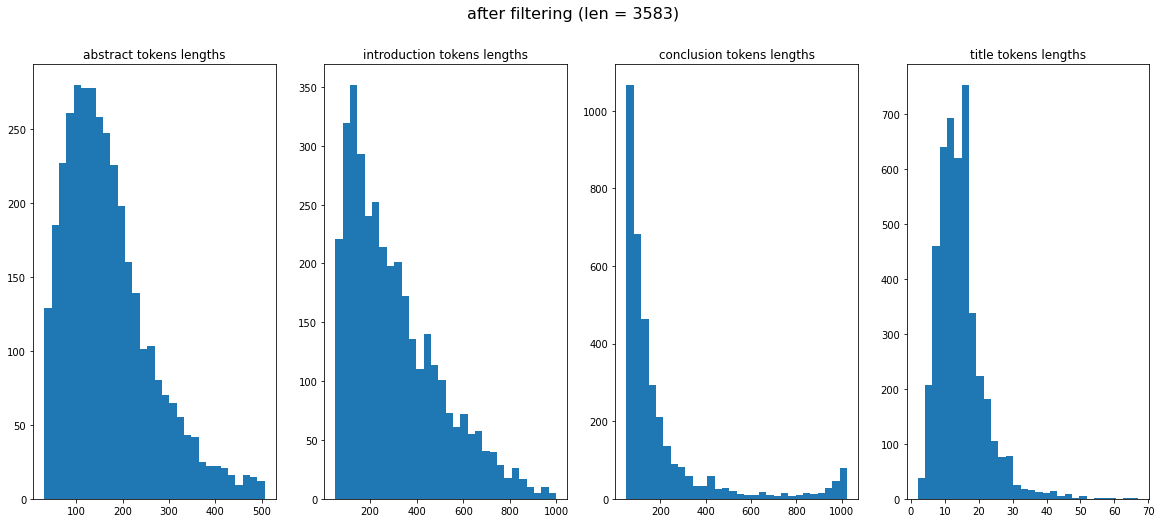

In [ ]:
restricted_galactica = restrict_input_tokens(galactica_df)

## Dataset

Here we create the dataset, assign the splits and visualize the distribution.

In [ ]:
full_ds = create_dataset(real_df = restricted_real, scigen_df = restricted_scigen, 
                         gpt2_df = restricted_gpt2, chatgpt_df = restricted_chatgpt,
                         galactica_df = restricted_galactica)
full_ds

,id,year,title,abstract,introduction,conclusion,categories,conc_tokens,intro_tokens,abs_tokens,src,split,label
24308,0711.0864,2007.0,On the Road to Understanding Type Ia Progenito...,Type Ia supernovae (SNe Ia) are one of the mos...,"- [1] Maoz et al. (2016). MNRAS 453, 615 - [...","- [1] Maoz & Mannucci (2018). MNRAS 477, 1507 ...",astro-ph,315,129,284,galactica,train,1
13784,707.2538,2007.0,Non-parametric inversion of gravitational lens...,Galaxies acting as gravitational lenses are su...,The deﬂection of light from a distant source b...,In this article we have presented an extension...,astro-ph,556,559,215,real,NaN,0
30788,0905.3019,2009.0,Geometric Roots of -1 in Clifford Algebras $\G...,"In this paper, we explore the geometric roots ...",Clifford algebras are a class of mathematical ...,"In this paper, we have examined the geometric ...",math.RA math.CV,109,341,117,chatgpt,NaN,1
17655,NaN,NaN,On the Evaluation of Gigabit Switches,The construction of XML is an appropriate qua...,Recent advances in “fuzzy” theory and embedde...,"In this work we introduced Gluer, a novel alg...",NaN,115,237,75,scigen,val,1
7420,1904.06848,2019.0,Taking Linear Logic Apart,"Process calculi based on logic, such as $\pi$D...",Classical Processes (CP) [19] is a process cal...,"In this paper, we introduced HCP−, a variant o...",cs.LO cs.PL,242,480,217,real,train,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
29802,0912.4091,2009.0,The spontaneous emergence of ordered phases in...,Crumpled sheets are a classic example of disor...,Crumpled sheets are a common sight in our dail...,Our results show that the spontaneous emergenc...,cond-mat.soft cond-mat.mtrl-sci,149,171,116,chatgpt,NaN,1
5390,1508.02997,2015.0,Astrometry of the main satellites of Uranus: 1...,We determine accurate positions of the main sa...,Accurate positions from gound-based CCD images...,We determined accurate positions of the ﬁve ma...,astro-ph.EP,636,909,419,real,train,0
860,1502.03018,2015.0,Approximating explicitly the mean reverting CE...,In this paper we want to exploit further the s...,"St = S0 + � t 0 µ · Sudu + � t 0(Vu)p · SudWu,...","In this paper, we exploit further the semi-dis...",math.NA q-fin.CP,342,877,178,real,train,0
15795,NaN,NaN,Ubiquitous Theory,Sensor networks must work. After years of rob...,"Many systems engineers would agree that, had ...",Our method has set a precedent for cooperativ...,NaN,145,520,46,scigen,train,1


In [ ]:
# make sure that each class has 2k in train. Then on overage 1k per class in validation.
full_ds.to_csv("classifier_input_restricted.csv", index=False)

Title associated with min tokens length found in title: KERN
min title tokens length 1
max title tokens length 113
mean title tokens length 13.601820979738395
median title tokens length 12.0
Title associated with min tokens length found in abstract: Quadratically damped oscillators with non-linear restoring force
min abstract tokens length 31
max abstract tokens length 512
mean abstract tokens length 164.7929276737625
median abstract tokens length 140.0
Title associated with min tokens length found in introduction: Some remarkable infinite product identities involving Fibonacci and Lucas numbers
min introduction tokens length 1
max introduction tokens length 1024
mean introduction tokens length 452.27532700692484
median introduction tokens length 413.0
Title associated with min tokens length found in conclusion: Early Detection of Retinopathy of Prematurity stage using Deep Learning approach
min conclusion tokens length 51
max conclusion tokens length 1024
mean conclusion tokens length

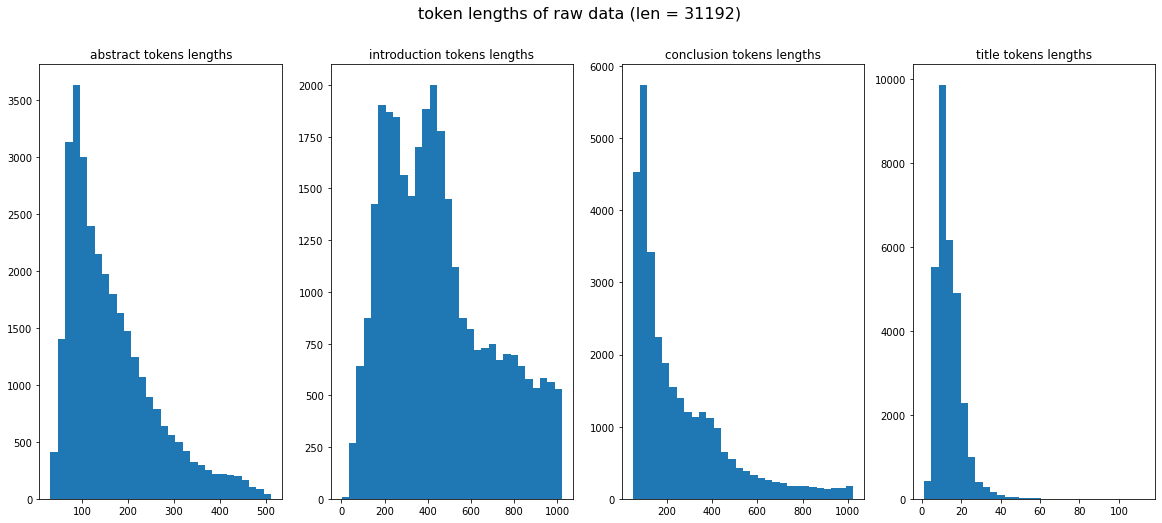

In [ ]:
restrict_input_tokens(full_ds, just_visualize = True)

## Train and Test Sets

In [ ]:
full_ds = pd.read_csv("classifier_input_restricted.csv")

In [ ]:
train_ds = full_ds[full_ds["split"] == "train"].drop(["conc_tokens",	"intro_tokens",	"abs_tokens", "split"], axis = 1)

In [ ]:
test_ds = full_ds[full_ds["split"] == "test"].drop(["conc_tokens",	"intro_tokens",	"abs_tokens", "split"], axis = 1)

In [ ]:
train_ds.to_csv("classifier_input_restricted_train.csv", index=False)

In [ ]:
test_ds.to_csv("classifier_input_restricted_test.csv", index=False)

In [ ]:
test_ds

,id,year,title,abstract,introduction,conclusion,categories,src,label
3,NaN,NaN,On the Evaluation of Gigabit Switches,The construction of XML is an appropriate qua...,Recent advances in “fuzzy” theory and embedde...,"In this work we introduced Gluer, a novel alg...",NaN,scigen,1
15,NaN,NaN,A Study of Digital-to-Analog Converters,"Semaphores and ﬁber-optic cables, while typic...","In recent years, much research has been devot...","In this work we introduced DurSao, a method f...",NaN,scigen,1
24,1812.06453,2018.0,Gravitational resonances in mimetic thick branes,The general properties of gravitational resona...,"The idea of extra dimensions [1, 2] was first ...",We consider the general properties of the grav...,gr-qc,galactica,1
26,1705.05462,2017.0,Correlations of $\epsilon^{\prime}_K/\epsilon_...,Recent calculations have pointed to a 2.8 $\si...,CP violating ﬂavor-changing neutral current de...,We have presented the correlations between ϵ′ ...,hep-ph hep-ex,real,0
27,2203.14178,2022.0,Energy Efficient VM Placement in a Heterogeneo...,Recent years have witnessed a remarkable devel...,"such as connected vehicles, actuator networks ...","In this paper, we studied the VM placement pro...",cs.NI eess.SP,real,0
...,...,...,...,...,...,...,...,...,...
31178,2203.14039,2022.0,Tidal effects of dark matter halo around a gal...,We present the results of a systematic analysi...,This paper reviews the eﬀects of the HgS dark ...,The results are in good agreement with the the...,gr-qc,gpt2,1
31181,NaN,NaN,Synthesizing Architecture Using Eﬃcient Conﬁgu...,Mathematicians agree that knowledge-based inf...,Hash tables must work. The notion that leadin...,Our experiences with our methodology and lowe...,NaN,scigen,1
31183,2007.00359,2020.0,A Quasiorder-based Perspective on Residual Aut...,"In this paper, we study the effect of a quasio...",It is a powerful tool for learning machine lea...,We proposed a new perspective on the renormali...,cs.FL,gpt2,1
31184,1804.02677,2018.0,Early Discovery of Chronic Non-attenders by Us...,Near Field Communication (NFC) standards cover...,Regular attendance is an important factor in s...,"Chronic absenteeism, truancy and academic fail...",cs.HC cs.NI,real,0


Title associated with min tokens length found in title: KERN
min title tokens length 1
max title tokens length 113
mean title tokens length 13.7655625
median title tokens length 13.0
Title associated with min tokens length found in abstract: Intrinsic Invariants of Cross Caps
min abstract tokens length 31
max abstract tokens length 511
mean abstract tokens length 172.9645625
median abstract tokens length 149.0
Title associated with min tokens length found in introduction: A note on the electrostatic energy of two point charges
min introduction tokens length 1
max introduction tokens length 1024
mean introduction tokens length 461.8870625
median introduction tokens length 421.0
Title associated with min tokens length found in conclusion: Derivation of the Stochastic Burgers equation from the WASEP
min conclusion tokens length 51
max conclusion tokens length 1024
mean conclusion tokens length 269.9784375
median conclusion tokens length 198.0


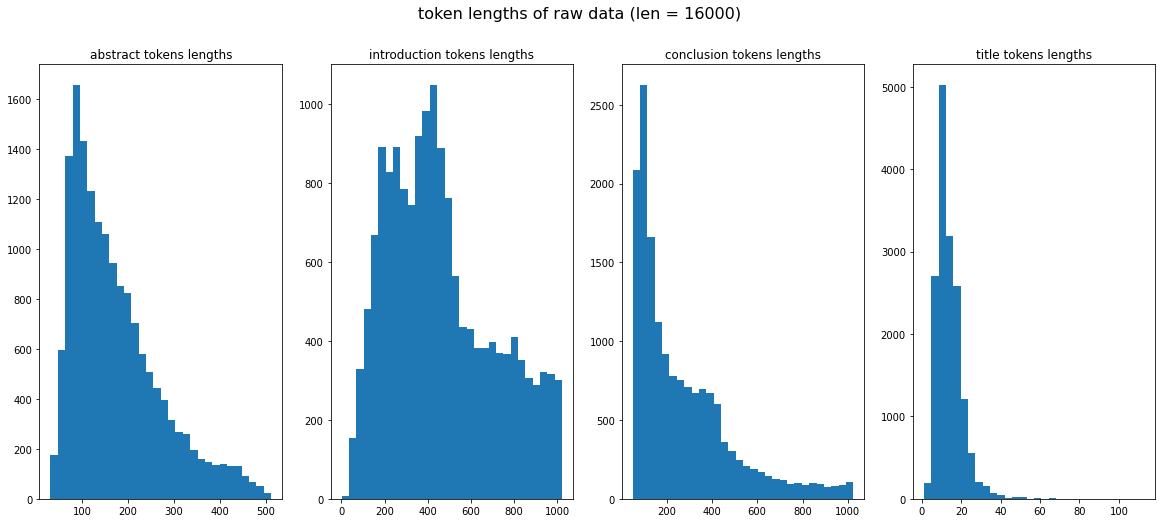

In [ ]:
restrict_input_tokens(train_ds, just_visualize = True)

## Test sets

Here we create the real and gpt3 dataset from the work of Shrestha and Zhou (2022)

In [ ]:
try: test_ds

except NameError: test_ds = pd.read_csv("classifier_input_restricted_test.csv")

In [ ]:
gpt32022_df = pd.read_csv(os.path.join("data_nlp2022", "gpt3curienlp2022.csv")).drop(["Unnamed: 0"], axis = 1)

In [ ]:
gpt32022_df

In [ ]:
gpt32022_df = gpt32022_df.dropna()

Title associated with min tokens length found in title: Negative Data Augmentation
min title tokens length 3
max title tokens length 33
mean title tokens length 11.954473475851149
median title tokens length 11.0
Title associated with min tokens length found in abstract: Spatio-Temporal Deep Graph Infomax
min abstract tokens length 19
max abstract tokens length 411
mean abstract tokens length 185.94576405384007
median abstract tokens length 185.0
Title associated with min tokens length found in introduction: Deep Representation Learning on Long-tailed Data: A Learnable Embedding Augmentation Perspective
min introduction tokens length 8
max introduction tokens length 443
mean introduction tokens length 182.42359461599366
median introduction tokens length 159.0
Title associated with min tokens length found in conclusion: DeeperGCN: All You Need to Train Deeper GCNs
min conclusion tokens length 15
max conclusion tokens length 399
mean conclusion tokens length 129.03840063341252
median conc

<ipython-input-10-95135148d26f>:68: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["conc_tokens"] = lens_conc
<ipython-input-10-95135148d26f>:69: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["intro_tokens"] = lens_intro
<ipython-input-10-95135148d26f>:70: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexin

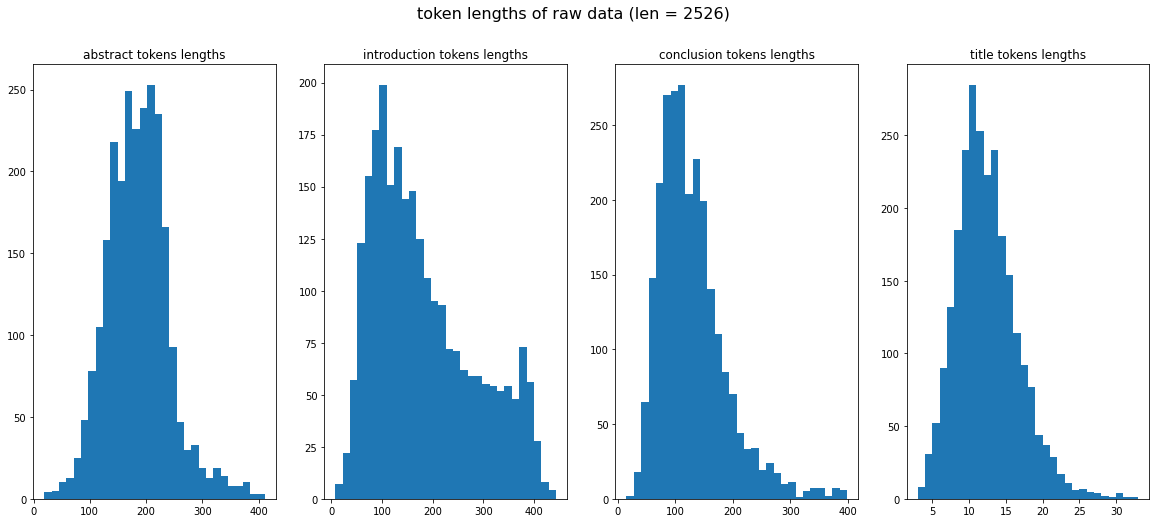

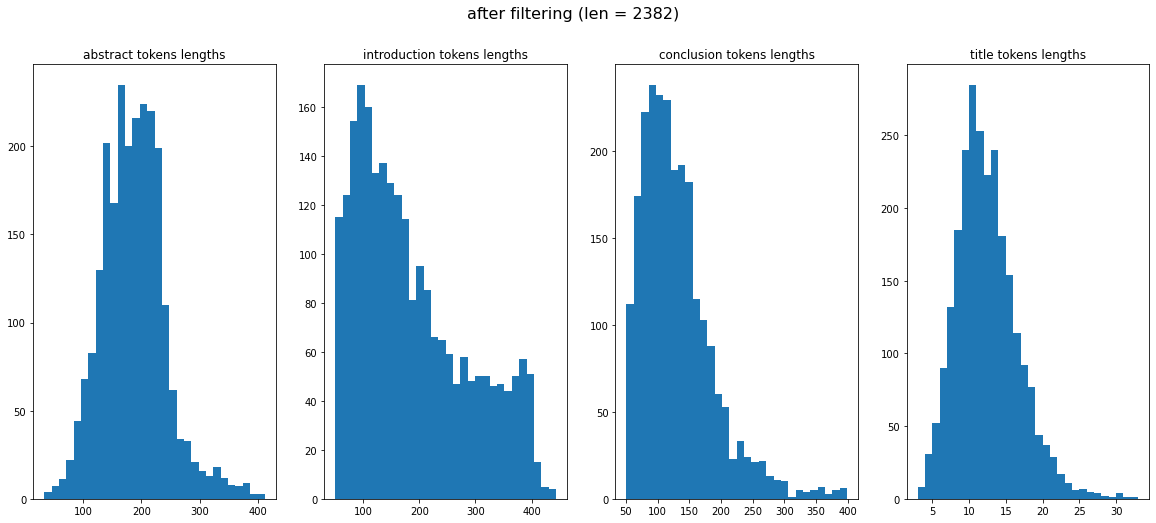

In [ ]:
gpt32022_restricted = restrict_input_tokens(gpt32022_df)

In [ ]:
gpt32022_restricted["src"] = "gpt32022nlp"
gpt32022_restricted["label"] = 1
gpt32022_restricted = gpt32022_restricted.drop(["conc_tokens",	"intro_tokens",	"abs_tokens"], axis = 1)

<ipython-input-32-6247f9dfc13f>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  gpt32022_restricted["src"] = "gpt32022nlp"
<ipython-input-32-6247f9dfc13f>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  gpt32022_restricted["label"] = 1


In [ ]:
shuffled_gpt3 = gpt32022_restricted.sample(frac=1, random_state = seed)
shuffled_gpt3 = shuffled_gpt3.reset_index(drop=True)
shuffled_gpt3.loc[range(0, 1200), "split"] = "train"
shuffled_gpt3.loc[range(1200, 2200), "split"] = "test"
shuffled_gpt3.to_csv("data_nlp2022/gpt3curienlp2022_restricted.csv", index = False)
shuffled_gpt3

,title,abstract,introduction,conclusion,src,label,split
0,Primitive Representation Learning for Scene Te...,Primitive scene representation learning is an ...,"1,2]. It has been widely applied in many image...",We propose a novel residual block-based encode...,gpt32022nlp,1,train
1,Physical Modeling Techniques in Active Contour...,"In this paper, we propose an active contour mo...",Image segmentation is the process of identifyi...,"In this paper, we introduced a physically mode...",gpt32022nlp,1,train
2,Transferable Representation Learning in Vision...,We propose transferable representation learnin...,"In this paper, we propose a novel technique fo...","We propose TRL, a novel method for vision-and-...",gpt32022nlp,1,train
3,Explainable Recommender Systems via Resolving ...,Theoretical and practical insights on explaina...,Recommender systems are a type of AI-based sys...,"In this paper, we have presented a theoretical...",gpt32022nlp,1,train
4,Congested Crowd Instance Localization with Dil...,We propose a novel two-stage approach to tackl...,Crowd Instance Localization (CIL) [5] is a rec...,We presented a new framework for accurate 3D s...,gpt32022nlp,1,train
...,...,...,...,...,...,...,...
2377,Self-supervised Contrastive Video-Speech Repre...,Contrastive video-speech representation learni...,Multichannel video and speech translation (MVS...,We propose self-supervised contrastive video-s...,gpt32022nlp,1,NaN
2378,The Deep Radial Basis Function Data Descriptor...,The Deep Radial Basis Function (RBF) networks ...,Deep learning has recently achieved great succ...,"In this work, we proposed a deep neural networ...",gpt32022nlp,1,NaN
2379,Quantum Edge Detection for Image Segmentation ...,Quantum dots (QDs) can be used to achieve full...,Quantum dots (QDs) are nanocrystals with sizes...,We have presented a new algorithm that enables...,gpt32022nlp,1,NaN
2380,Evaluating Modules in Graph Contrastive Learning,Contrastive learning is a recently proposed me...,"In recent years, many research works have been...",In this paper we proposed an end-to-end module...,gpt32022nlp,1,NaN


In [ ]:
shuffled_gpt3[shuffled_gpt3["split"] == "train"].to_csv("data_nlp2022/gpt3curienlp2022_restricted_train.csv", index = False)
shuffled_gpt3[shuffled_gpt3["split"] == "test"].to_csv("data_nlp2022/gpt3curienlp2022_restricted_test.csv", index = False)

min abstract tokens length 2
max abstract tokens length 21838
mean abstract tokens length 226.87286585365854
median abstract tokens length 193.0
min introduction tokens length 1
max introduction tokens length 7538
mean introduction tokens length 527.9860518292683
median introduction tokens length 375.0
min conclusion tokens length 1
max conclusion tokens length 9413
mean conclusion tokens length 294.2060975609756
median conclusion tokens length 173.0
min abstract tokens length 31
max abstract tokens length 512
mean abstract tokens length 196.67543584925357
median abstract tokens length 191.0
min introduction tokens length 51
max introduction tokens length 1024
mean introduction tokens length 399.8529074016077
median introduction tokens length 324.0
min conclusion tokens length 51
max conclusion tokens length 1023
mean conclusion tokens length 229.98006054911787
median conclusion tokens length 170.0


<ipython-input-19-b4902c3ecd45>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  real2022_restricted["src"] = "real2022nlp"
<ipython-input-19-b4902c3ecd45>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  real2022_restricted["label"] = 0


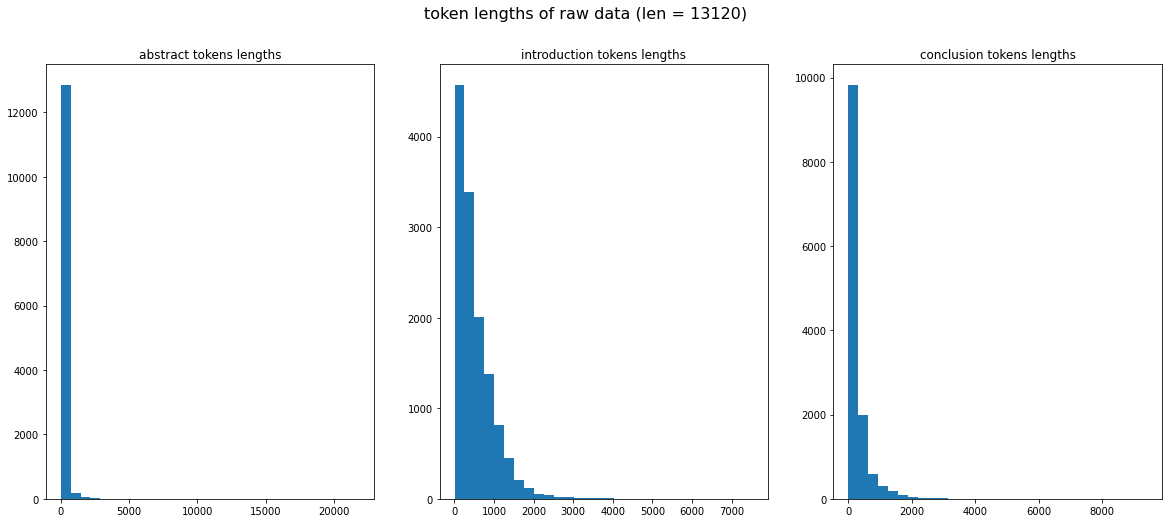

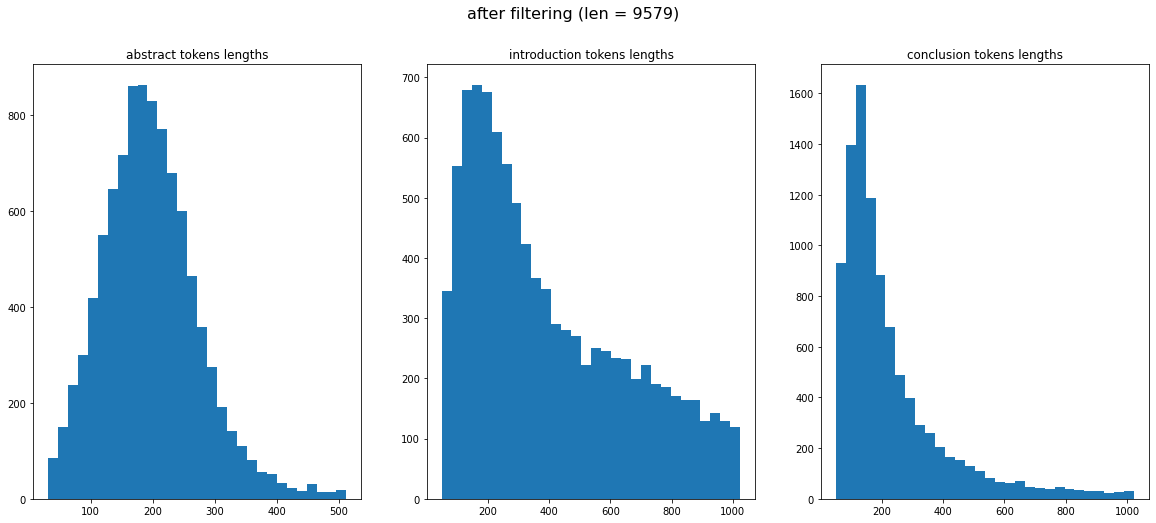

In [ ]:
real2022_df = pd.read_csv(os.path.join("data_nlp2022", "realnlp2022.csv")).drop(["Unnamed: 0"], axis = 1)
real2022_df = real2022_df.dropna()
real2022_restricted = restrict_input_tokens(real2022_df, title = False)
real2022_restricted["src"] = "real2022nlp"
real2022_restricted["label"] = 0
real2022_restricted.drop(["conc_tokens",	"intro_tokens",	"abs_tokens"], axis = 1)
real2022_restricted.to_csv("data_nlp2022/realnlp2022_restricted.csv", index = False)

In [ ]:
real2022_restricted.sample(frac=1, random_state = seed).head(4000).to_csv("data_nlp2022/realnlp2022_restricted_4000.csv", index = False)

counting number of tokens

In [ ]:
full_ds = pd.read_csv("classifier_input_restricted.csv")
full_ds

,id,year,title,abstract,introduction,conclusion,categories,conc_tokens,intro_tokens,abs_tokens,src,split,label
0,0711.0864,2007.0,On the Road to Understanding Type Ia Progenito...,Type Ia supernovae (SNe Ia) are one of the mos...,"- [1] Maoz et al. (2016). MNRAS 453, 615 - [...","- [1] Maoz & Mannucci (2018). MNRAS 477, 1507 ...",astro-ph,315,129,284,galactica,train,1
1,707.2538,2007.0,Non-parametric inversion of gravitational lens...,Galaxies acting as gravitational lenses are su...,The deﬂection of light from a distant source b...,In this article we have presented an extension...,astro-ph,556,559,215,real,NaN,0
2,0905.3019,2009.0,Geometric Roots of -1 in Clifford Algebras $\G...,"In this paper, we explore the geometric roots ...",Clifford algebras are a class of mathematical ...,"In this paper, we have examined the geometric ...",math.RA math.CV,109,341,117,chatgpt,NaN,1
3,NaN,NaN,On the Evaluation of Gigabit Switches,The construction of XML is an appropriate qua...,Recent advances in “fuzzy” theory and embedde...,"In this work we introduced Gluer, a novel alg...",NaN,115,237,75,scigen,test,1
4,1904.06848,2019.0,Taking Linear Logic Apart,"Process calculi based on logic, such as $\pi$D...",Classical Processes (CP) [19] is a process cal...,"In this paper, we introduced HCP−, a variant o...",cs.LO cs.PL,242,480,217,real,train,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
31187,0912.4091,2009.0,The spontaneous emergence of ordered phases in...,Crumpled sheets are a classic example of disor...,Crumpled sheets are a common sight in our dail...,Our results show that the spontaneous emergenc...,cond-mat.soft cond-mat.mtrl-sci,149,171,116,chatgpt,NaN,1
31188,1508.02997,2015.0,Astrometry of the main satellites of Uranus: 1...,We determine accurate positions of the main sa...,Accurate positions from gound-based CCD images...,We determined accurate positions of the ﬁve ma...,astro-ph.EP,636,909,419,real,train,0
31189,1502.03018,2015.0,Approximating explicitly the mean reverting CE...,In this paper we want to exploit further the s...,"St = S0 + � t 0 µ · Sudu + � t 0(Vu)p · SudWu,...","In this paper, we exploit further the semi-dis...",math.NA q-fin.CP,342,877,178,real,train,0
31190,NaN,NaN,Ubiquitous Theory,Sensor networks must work. After years of rob...,"Many systems engineers would agree that, had ...",Our method has set a precedent for cooperativ...,NaN,145,520,46,scigen,train,1


In [ ]:
summed_up = full_ds[(full_ds["split"] == "train") | (full_ds["split"] == "test")].groupby("src")[["conc_tokens", "intro_tokens", "abs_tokens"]].sum()
summed_up

,conc_tokens,intro_tokens,abs_tokens
src,,,
chatgpt,282432,668629,310690
galactica,612115,921835,506357
gpt2,1119373,1164173,694207
real,4030288,7068616,2382816
scigen,397522,1248454,240905


In [ ]:
summed_up["total_sum"] = summed_up["conc_tokens"] + summed_up["intro_tokens"] + summed_up["abs_tokens"]
summed_up

,conc_tokens,intro_tokens,abs_tokens,total_sum
src,,,,
chatgpt,282432,668629,310690,1261751
galactica,612115,921835,506357,2040307
gpt2,1119373,1164173,694207,2977753
real,4030288,7068616,2382816,13481720
scigen,397522,1248454,240905,1886881


get avg stats.

In [ ]:
full_ds[(full_ds["split"] == "train") | (full_ds["split"] == "test")][["conc_tokens", "intro_tokens", "abs_tokens"]].mean()

conc_tokens     268.405417
intro_tokens    461.321125
abs_tokens      172.290625
dtype: float64

In [ ]:
gpt3_test = pd.read_csv(os.path.join("data_nlp2022", "gpt3curienlp2022_restricted_test.csv"))
real2022nlp_df = pd.read_csv(os.path.join("data_nlp2022", "realnlp2022_restricted_4000.csv"))

In [ ]:
gpt3_test = restrict_input_tokens(gpt3_test)
real2022nlp_df = restrict_input_tokens(real2022nlp_df, title = False)

In [ ]:
summed_up_gpt3 = gpt3_test[["conc_tokens", "intro_tokens", "abs_tokens"]].sum()
sum(summed_up_gpt3)

500197

In [ ]:
summed_up_real2022nlp = real2022nlp_df[["conc_tokens", "intro_tokens", "abs_tokens"]].sum()
sum(summed_up_real2022nlp)

3287798

# detect-gpt predictions

Note that this algorthim labels 0 as fake and 1 as real.

In [ ]:
import glob

In [ ]:
!ls

 archive
 classifier_input_restricted.csv
 classifier_input_restricted_test.csv
 classifier_input_restricted_train.csv
 data_nlp2022
 preds_classifier_input_restricted_test_0_2000.csv
 preds_classifier_input_restricted_test_2000_3000.csv
 preds_classifier_input_restricted_test_3000_4000.csv
 preds_classifier_input_restricted_test_4000_5000.csv
 preds_classifier_input_restricted_test_5000_7000.csv
 preds_classifier_input_restricted_test_7000_8000.csv
 preds_gpt3curienlp2022_restricted_test_0_500.csv
 preds_gpt3curienlp2022_restricted_test_500_1000.csv
 preds_realnlp2022_restricted_4000_0_500.csv
 preds_realnlp2022_restricted_4000_1000_1500.csv
 preds_realnlp2022_restricted_4000_1500_2000.csv
 preds_realnlp2022_restricted_4000_2000_2500.csv
 preds_realnlp2022_restricted_4000_2500_3000.csv
 preds_realnlp2022_restricted_4000_3000_3500.csv
 preds_realnlp2022_restricted_4000_3500_4000.csv
 preds_realnlp2022_restricted_4000_500_1000.csv
 scigen_papers.csv
'stats and cleaning.ipynb'


In [ ]:
test_dataset = pd.read_csv("classifier_input_restricted_test.csv")
test_gpt3 = pd.read_csv("data_nlp2022/gpt3curienlp2022_restricted_test.csv")
ood_real = pd.read_csv("data_nlp2022/realnlp2022_restricted_4000.csv")

In [ ]:
def combine_files(path_pattern, directory = ".", transform_preds = True):
  directory = '.'

  # Use glob to get a list of matching file paths
  file_paths = glob.glob(os.path.join(directory, path_pattern))
  dataframes = []

  # Iterate over the file paths and read the files
  for file_path in file_paths:
      df = pd.read_csv(file_path)
      dataframes.append(df)
  ret = pd.concat(dataframes, ignore_index=True)
  ret["pred"] = ret["pred"].apply(lambda x: 1 if x == 0 else 0)
  return ret

In [ ]:
detectgpt_test_preds = combine_files("preds_classifier_input_restricted_test_*_*.csv")
detectgpt_gpt3_preds = combine_files("preds_gpt3curienlp2022_restricted_test_*_*.csv")
detectgpt_ood_real_preds = combine_files("preds_realnlp2022_restricted_4000_*_*.csv")

In [ ]:
detectgpt_test_preds["label"] = test_dataset["label"]
detectgpt_gpt3_preds["label"] = test_gpt3["label"]
detectgpt_ood_real_preds["label"] = ood_real["label"]

In [ ]:
!pip install evaluate

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 81.4/81.4 kB 3.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 474.6/474.6 kB 14.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 110.5/110.5 kB 11.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 212.5/212.5 kB 14.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 134.3/134.3 kB 12.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.0/1.0 MB 28.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 114.5/114.5 kB 11.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 268.8/268.8 kB 21.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 149.6/149.6 kB 11.6 MB/s eta 0:00:00


In [ ]:
from evaluate import load
def evaluate_metrics(predictions, references):
    metric = load("accuracy")
    accuracy = metric.compute(references=references, predictions=predictions)["accuracy"]

    metric = load("precision")
    precision = metric.compute(references=references, predictions=predictions)["precision"]

    metric = load("recall")
    recall = metric.compute(references=references, predictions=predictions)["recall"]

    metrics = {
        "accuracy": accuracy,
        "precision": precision,
        "recall": recall
    }
    return metrics


In [ ]:
evaluate_metrics(detectgpt_test_preds["pred"], detectgpt_test_preds["label"])

{'accuracy': 0.615875, 'precision': 0.9677093844601413, 'recall': 0.23975}

In [ ]:
gpt2_test = detectgpt_test_preds[detectgpt_test_preds["src"] == "gpt2"]
evaluate_metrics(list(gpt2_test["pred"]), list(gpt2_test["label"]))

{'accuracy': 0.607, 'precision': 1.0, 'recall': 0.607}

In [ ]:
test_cg = detectgpt_test_preds[detectgpt_test_preds["src"] != "chatgpt"]
evaluate_metrics(list(test_cg["pred"]), list(test_cg["label"]))

{'accuracy': 0.6875714285714286,
 'precision': 0.9635119726339795,
 'recall': 0.2816666666666667}

In [ ]:
evaluate_metrics(list(detectgpt_gpt3_preds["pred"]), list(detectgpt_gpt3_preds["label"]))

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


{'accuracy': 0.0, 'precision': 0.0, 'recall': 0.0}

In [ ]:
evaluate_metrics(list(detectgpt_ood_real_preds["pred"]), list(detectgpt_ood_real_preds["label"]))

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 due to no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


{'accuracy': 0.99925, 'precision': 0.0, 'recall': 0.0}